In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import sklearn


In [2]:
# data type
processed_data = pd.read_csv("../data/final_df.csv")
mca_data_75 = pd.read_csv("../data/mca_components.csv")
smote_data = pd.read_csv("../data/df_smote_with_target.csv").iloc[:, :-1]
mca_smote_data_75 = pd.read_csv("../data/mca_components_smote_75.csv")
mca_smote_data_95 = pd.read_csv("../data/mca_components_smote_95.csv")


raw_ground_truth = pd.read_csv("../data/Rawdata.csv", encoding='cp1252')["POLICY3"]
smote_ground_truth = pd.read_csv("../data/df_smote_with_target.csv").iloc[:, -1]






In [3]:
def h_clustering(components, ground_truth):

	truth1 = """Coronavirus is a serious illness and we should continue social distancing measures until we can safely relax them, but try to re-open as much as possible as soon as it is reasonable safe."""
	truth2 = """The disease is a large threat to the health of the nation that will force unconscionable choices if we do not all act together to socially distance for as long as needed even if that means great personal sacrifice."""
	truth3 = """This is all an overreaction. The disease is not that serious. We should relax social distancing measure right away."""
						
	labels=[]
	for truth in ground_truth:
					if truth == truth1:
									labels.append(1)
					elif truth == truth2:
									labels.append(2)
					else:
									labels.append(3)
	linkage = sch.linkage(components, method="ward", optimal_ordering=False)

	# clustering
	plt.figure(figsize=(10, 5))

	sch.dendrogram(linkage, labels=labels, leaf_rotation=90)

	plt.title("Hierarchical Clustering")
	plt.xlabel("Surveys")
	plt.ylabel("Distance")
	plt.show()

	num_clusters = 3
	clusters = sch.fcluster(linkage, num_clusters, criterion='maxclust')
	# Silhouette Score 
	silhouette = sklearn.metrics.silhouette_score(components, clusters)
	# Davies-Bouldin Score
	dbscore = sklearn.metrics.davies_bouldin_score(components, clusters)
	# Fowlkes Mallows Score
	fmscore = sklearn.metrics.fowlkes_mallows_score(labels, clusters, sparse=False)
	# Adjusted Rand Index
	adj_rand_idx = sklearn.metrics.adjusted_rand_score(labels, clusters)
	
	print(f"Silhouette: {silhouette}\nDavies-Bouldin: {dbscore}\nFowlkes Mallow: {fmscore}\nAdjusted Random Index: {adj_rand_idx}")
						


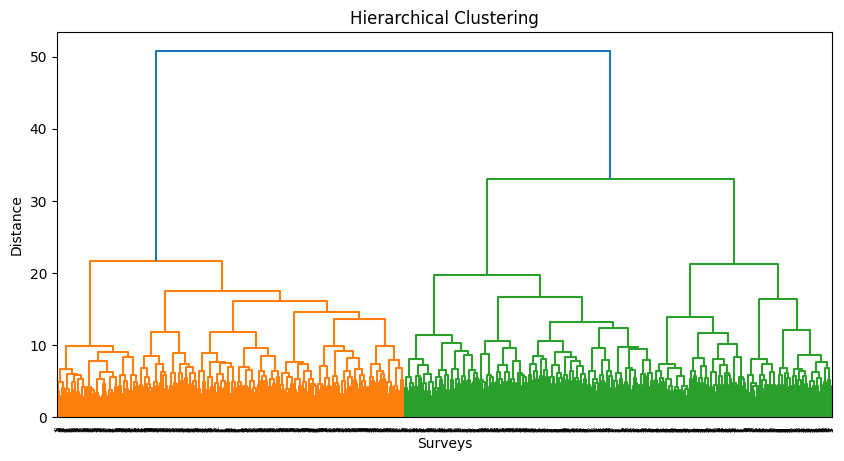

Silhouette: 0.0728045363768162
Davies-Bouldin: 3.5968775611286627
Fowlkes Mallow: 0.3922327145339522
Adjusted Random Index: 0.026000214547758724


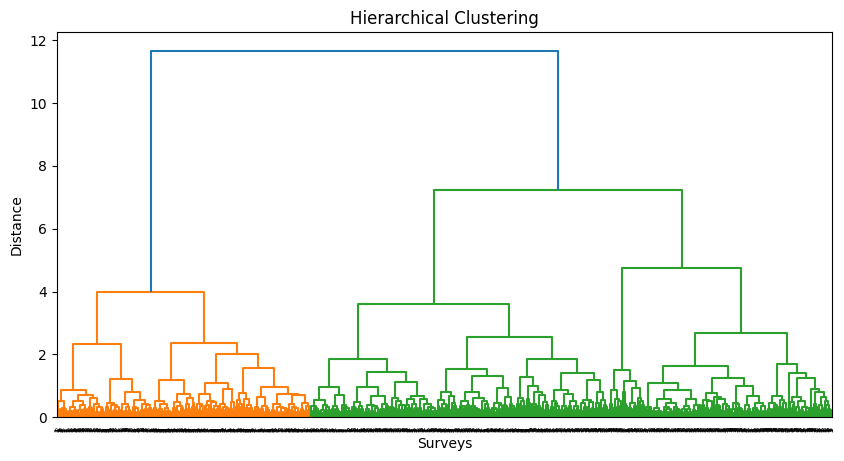

Silhouette: 0.21407746232203922
Davies-Bouldin: 1.5258350059936394
Fowlkes Mallow: 0.3854122811379663
Adjusted Random Index: 0.03123605867710302


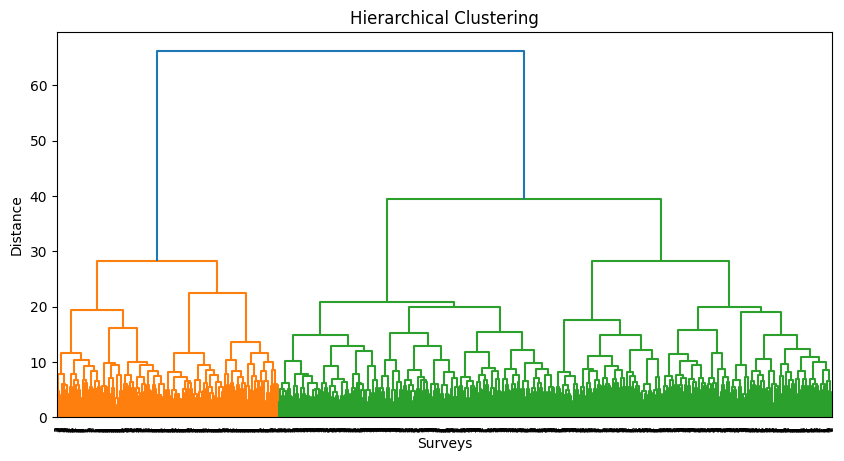

Silhouette: 0.0684803876643738
Davies-Bouldin: 3.67427549650421
Fowlkes Mallow: 0.3783070324908023
Adjusted Random Index: 0.06564690063405502


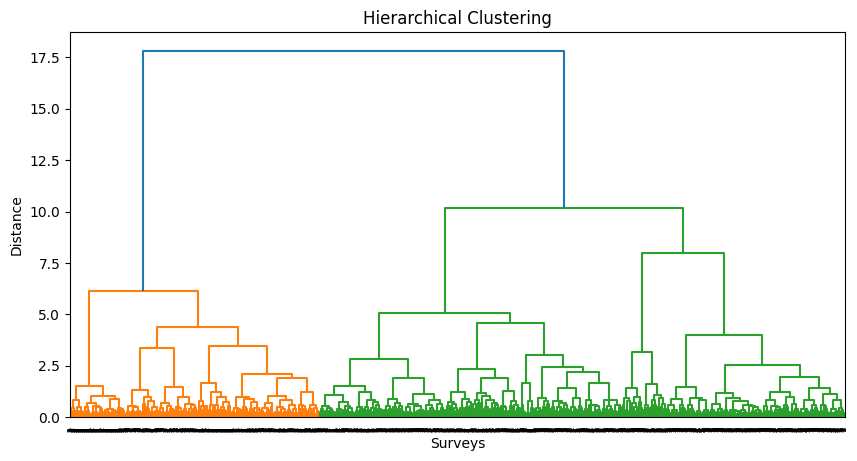

Silhouette: 0.2173633025120074
Davies-Bouldin: 1.5122847569518318
Fowlkes Mallow: 0.367636535554049
Adjusted Random Index: 0.04800163104494537


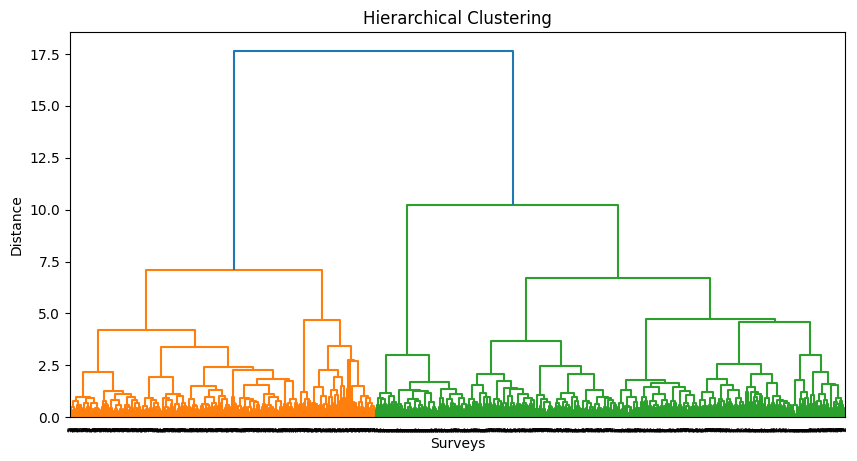

Silhouette: 0.17531078068378916
Davies-Bouldin: 1.5467428983731022
Fowlkes Mallow: 0.4104813433866847
Adjusted Random Index: 0.06666716507885877


In [4]:
h_clustering(processed_data, raw_ground_truth)
h_clustering(mca_data_75, raw_ground_truth)
h_clustering(smote_data, smote_ground_truth)
h_clustering(mca_smote_data_75, smote_ground_truth)
h_clustering(mca_smote_data_95, smote_ground_truth)




In [5]:
num_clusters = 3
clusters = sch.fcluster(linkage, num_clusters, criterion='maxclust')
# Silhouette Score 
silhouette = sklearn.metrics.silhouette_score(components, clusters)
# Davies-Bouldin Score
dbscore = sklearn.metrics.davies_bouldin_score(components, clusters)
# Fowlkes Mallows Score
fmscore = sklearn.metrics.fowlkes_mallows_score(labels, clusters, sparse=False)
# Adjusted Rand Index
adj_rand_idx = sklearn.metrics.adjusted_rand_score(labels, clusters)

print(f"Silhouette: {silhouette}\nDavies-Bouldin: {dbscore}\nFowlkes Mallow: {fmscore}\nAdjusted Random Index: {adj_rand_idx}")


NameError: name 'linkage' is not defined